<a href="https://colab.research.google.com/github/prithwis/parashar21/blob/main/P21_45_08_TransitTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://1.bp.blogspot.com/_5QlanosqxiQ/SXLOLTu7S7I/AAAAAAAAAm8/0r6C7lCxsic/S1600-R/p21-header-003.png) <br>


---



[Prithwis Mukerjee](http://www.yantrajaal.com) ||
Website - [Parashar21](https://parashar21.blogspot.com)<br>

Copyright (c) 2022, Prithwis Mukerjee All rights reserved.

This source code is licensed under the GNU GPL v3.0 -style license found in the LICENSE file in the root directory of this source tree.

#Rationale




#SetUp Environment

##Install Software

In [1]:
!pip -qq install pyswisseph                                 # https://stackoverflow.com/questions/64277506/pip-install-options-unclear
!pip -qq install python-docx                                #https://python-docx.readthedocs.io/en/latest/
#!/usr/bin/python3 -m pip install "pymongo[srv]"            # Required only if used with Atlas remote servers
#!apt install mongodb > /dev/null                            # install local MongoDB server           
#!service mongodb start                                      # start Local MongoDB server instance

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 5.6 MB 5.2 MB/s 


##Install, import prerequisites

In [19]:
#Utility functions 
from pymongo import MongoClient
import pandas as pd
import dateutil
import json
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from datetime import datetime
from datetime import timedelta
import pytz
from google.colab import files

#import matplotlib.pyplot as plt
#import math

import os

In [3]:
#Load p21 modules from github
!wget -O p21.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21.py                  # all global variables
!wget -O p21utils.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utils.py        # large number of utility functions
!wget -O p21utilsR.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utilsR.py      # report writing utility functions
!wget -O p21swe.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21swe.py            # Swiss Ephemeris functions
!wget -O p21YogInfo.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21YogInfo.py    # yog data - description and conditions 
# ---------------------------

#!wget -O Saraswati.png -q https://github.com/prithwis/parashar21/raw/main/images/Saraswati02.png                 
#!wget -O p21logo.png -q https://github.com/prithwis/parashar21/raw/main/images/p21logo-002-1.png   



In [4]:
import p21
import p21utils
import p21utilsR
import p21swe
#import p21YogInfo
# ------------------------------------------------
# required for multiple imports of the same module
# ------------------------------------------------
import importlib
importlib.reload(p21)
importlib.reload(p21utils)
importlib.reload(p21utilsR)
importlib.reload(p21swe)
#importlib.reload(p21YogInfo)

10 Yogs on record
0 : Amala Yog | 10th from Moon OR Lagna should have a benefic
1 : RajLakshana Yog | Jupiter, Venus, Mercury, Moon should be in Lagna or they should be in a Kendra
2 : Chatussagara Yog | All the Kendras 1/4/7/10 are occupied by planets, Ra, Ke not counted here
3 : Adhi678 Yog | Benefics located in 6/7/8th  from Moon
4 : Chandra Mangal Yog | Mars Conjoins Moon or  Mars and Moon in Mutual Aspect
5 : Kemadruma Yog : No planets on either sides of the Moon
6 : Anapha Yog |Planets other than Sun in 12th Place from Moon
7 : Sunapha Yog |Planets other than Sun in 2nd Place from Moon
8 : Dhurdhura Yog | Planets on both sides of the Moon
9 : Gajakesari Yog | Jupiter is in Kendra or 1,4,7,10th from Moon


<module 'p21swe' from '/content/p21swe.py'>

In [5]:
#Download Swiss Ephemeris Files 
!wget -q http://www.astro.com/ftp/swisseph/ephe/seas_18.se1
!wget -q http://www.astro.com/ftp/swisseph/ephe/semo_18.se1
!wget -q http://www.astro.com/ftp/swisseph/ephe/sepl_18.se1
!mkdir ephe
!mv *.se1 ephe
#------------------------------
# Configure SWE with appropriate parameters
#
p21swe.C01_configSWE()

#New Way

In [22]:
#@title Static Data
#@markdown ### Specify Reference Rashi:
rRashi = 'Dhanu' #@param ["Mesh","Vrish","Mithun","Karkat","Simha","Kanya","Tula","Vrishchik","Dhanu","Makar","Kumbh","Meen"]
#@markdown ---
#@markdown ### Using Calcutta as default location:
PoB_Lat = 25.43 #@param {type:"number"}
PoB_Lon = 81.85 #@param {type:"number"}
TZ_OffHours = 5.5
DoB_Time = '12:01'
#PoB_Lat = 25.43
#PoB_Lon = 81.85
Name = p21.gName
Gender = 'x'
tag1 = 'nil'
tag3 = 'nil'
tag5 = 'nil'
p21.pName = p21.gName
p21.ChartType = 'Rashi'
RashiNumber = p21.RashiName.index(rRashi)
RashiLon = RashiNumber * 30 - 15

In [23]:
print(RashiNumber, RashiLon)

9 255


In [8]:
current = datetime.now(pytz.timezone('Asia/Kolkata'))
print(current)

2022-10-05 05:46:36.053279+05:30


In [9]:
def getData(cDT):
    DoB_Day = int(cDT.strftime("%-d"))
    DoB_Mon = int(cDT.strftime("%-m"))
    DoB_Year = int(cDT.strftime("%Y"))
    #print(DoB_Time)

    sData = [DoB_Day,DoB_Mon,DoB_Year,DoB_Time,TZ_OffHours,PoB_Lat,PoB_Lon,Name, Gender, tag1, tag3,tag5]
    sLabels = ['DoB_Day','DoB_Mon','DoB_Year','DoB_Time','TZ_OffHours','PoB_Lat','PoB_Lon','Name','Gender','tag1','tag3','tag5']
    return(pd.Series(sData, index = sLabels))

In [14]:
def setData(c):
    p21swe.C02_parsePersonData(c)
    p21swe.C03_convertDates()
    p21swe.C04_calculateGrahaPositions()
    p21swe.C05_buildGLonGRet()
    p21.GLonRet['GLon']['La'] = RashiLon
    p21utils.R11_LocateGrahaInRashi()
    #print(p21.GRashiA)

In [18]:
def getDelta(cD,bA,aA,bR,aR,AllTransits = False):
    #print('getDelta',cD)
    cDs = cD.strftime("%d %b %y")+'|'
    for G in p21.Graha:
        if bA[G] != aA[G]:
            if G not in ['Mo', 'Me']:               # Excludes certain grahas to reduce the clutter
                print(cDs, G, 'TRANSITS from ', bA[G], 'to ', aA[G])
            else:
                if AllTransits:
                    print(cDs, G, 'transits from ', bA[G], 'to ', aA[G])
            #print(cDs, G, 'transits from ', bA[G], 'to ', aA[G])
        if bR['GRet'][G] != aR['GRet'][G]:
            #print(cD,G, 'changes from ', bR['GRet'][G], 'to ', aR['GRet'][G], ' retrograde')
            if bR['GRet'][G]:
                print(cDs, G, 'turns DIRECT')
            else:
                print(cDs, G, 'turns RETRO')

In [42]:
#!mkdir ./cImages
!rm ./cImages/*.png


In [43]:
%%capture
buildMovie = True
numberOfDays = 100
sDate = datetime.now(pytz.timezone('Asia/Kolkata'))
cDate = sDate

setData(getData(cDate))
for count in range(numberOfDays):
    
    prevGrashiA = p21.GRashiA
    prevGLonRet = p21.GLonRet
    cDate += timedelta(days=1)

    setData(getData(cDate))
    if buildMovie:
        p21.cID = cDate.strftime("%d %b %y")
        p21utilsR.R12B_drawChart_Bengal()
        newName = './cImages/img'+str(count)+'.png'
        oldName = './RashiChart.png'
        os.rename(oldName, newName)
    getDelta(cDate,prevGrashiA,p21.GRashiA,prevGLonRet,p21.GLonRet)
    

In [48]:
#!ffmpeg -f image2 -r 1/1 -i ./cImages/img%01d.png -vcodec mpeg4 -y ./p21Transitz.mp4 


# changing the FPS to 5
!ffmpeg -f image2 -r 5 -i ./cImages/img%01d.png -vcodec mpeg4 -y ./p21Transitz.mp4 

now = datetime.now(pytz.timezone('Asia/Kolkata'))
oldName = './p21Transitz.mp4'
newName = './p21Transitz'+now.strftime("%H%M%S")+'.mp4'
os.rename(oldName, newName)

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [55]:
# changing the FPS to 5
!ffmpeg -f image2 -r 5 -i ./cImages/img%d.png -vcodec mpeg4 -y ./p21Transitz.mp4 

now = datetime.now(pytz.timezone('Asia/Kolkata'))
oldName = './p21Transitz.mp4'
newName = './p21Transitz'+now.strftime("%H%M%S")+'.mp4'
os.rename(oldName, newName)

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

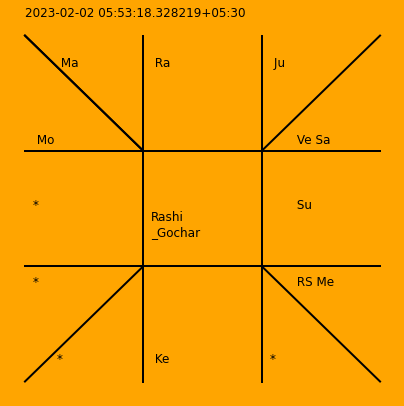

In [25]:
#p21.pName = p21.gName
p21.cID = cDate
p21utilsR.R12B_drawChart_Bengal()

#Chronobooks <br>
![alt text](https://1.bp.blogspot.com/-lTiYBkU2qbU/X1er__fvnkI/AAAAAAAAjtE/GhDR3OEGJr4NG43fZPodrQD5kbxtnKebgCLcBGAsYHQ/s600/Footer2020-600x200.png)<hr>
Chronotantra and Chronoyantra are two science fiction novels that explore the collapse of human civilisation on Earth and then its rebirth and reincarnation both on Earth as well as on the distant worlds of Mars, Titan and Enceladus. But is it the human civilisation that is being reborn? Or is it some other sentience that is revealing itself. 
If you have an interest in AI and found this material useful, you may consider buying these novels, in paperback or kindle, from [http://bit.ly/chronobooks](http://bit.ly/chronobooks)